# Learning Curve Analysis
Visualize how model performance changes with training set size.
Assumes results from `run_learning_curve_sizes.py` (CSV with train_size, val/test metrics).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

results_path = "../data/learning_curve_sizes.csv"
df = pd.read_csv(results_path)
df = df.sort_values("train_size")

print(df.head())
print(f"Rows: {len(df)}; Train sizes: {df['train_size'].tolist()}")

   train_size                                subset_path  val_precision  \
5         500    data/train_subsets/train_subset_500.csv       0.785714   
4        3125   data/train_subsets/train_subset_3125.csv       0.859504   
3        6250   data/train_subsets/train_subset_6250.csv       0.842105   
2       12500  data/train_subsets/train_subset_12500.csv       0.863813   
1       25000  data/train_subsets/train_subset_25000.csv       0.900929   

   val_recall    val_f1  val_bal_acc  
5       0.550  0.647059       0.7000  
4       0.832  0.845528       0.8480  
3       0.896  0.868217       0.8640  
2       0.888  0.875740       0.8740  
1       0.873  0.886745       0.8885  
Rows: 6; Train sizes: [500, 3125, 6250, 12500, 25000, 50000]


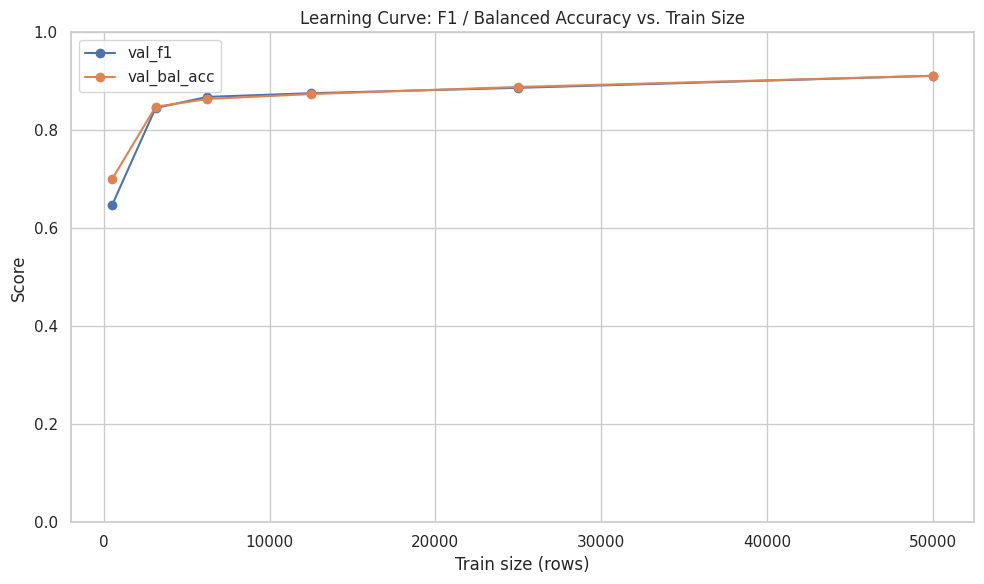

In [2]:
metrics = ["val_f1", "val_bal_acc"]

plt.figure(figsize=(10, 6))
for m in metrics:
    plt.plot(df["train_size"], df[m], marker="o", label=m)
plt.xlabel("Train size (rows)")
plt.ylabel("Score")
plt.title("Learning Curve: F1 / Balanced Accuracy vs. Train Size")
plt.legend()
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [3]:
# If thresholds vary, inspect them
if "threshold" in df.columns:
    plt.figure(figsize=(8, 4))
    plt.plot(df["train_size"], df["threshold"], marker="o")
    plt.xlabel("Train size (rows)")
    plt.ylabel("Best threshold (val-tuned)")
    plt.title("Chosen thresholds vs. train size")
    plt.tight_layout()
    plt.show()

df

,train_size,subset_path,val_precision,val_recall,val_f1,val_bal_acc
5,500,data/train_subsets/train_subset_500.csv,0.785714,0.550,0.647059,0.70000
4,3125,data/train_subsets/train_subset_3125.csv,0.859504,0.832,0.845528,0.84800
3,6250,data/train_subsets/train_subset_6250.csv,0.842105,0.896,0.868217,0.86400
2,12500,data/train_subsets/train_subset_12500.csv,0.863813,0.888,0.875740,0.87400
1,25000,data/train_subsets/train_subset_25000.csv,0.900929,0.873,0.886745,0.88850
0,50000,data/train_subsets/train_subset_50000.csv,0.910634,0.912,0.911317,0.91125
